In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.neural_network import  MLPClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
rcParams['figure.figsize'] = 15,5 
sns.set_style('darkgrid')

In [4]:
tit_d = pd.read_csv('titanic.csv')
tit_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit_d.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
tit_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


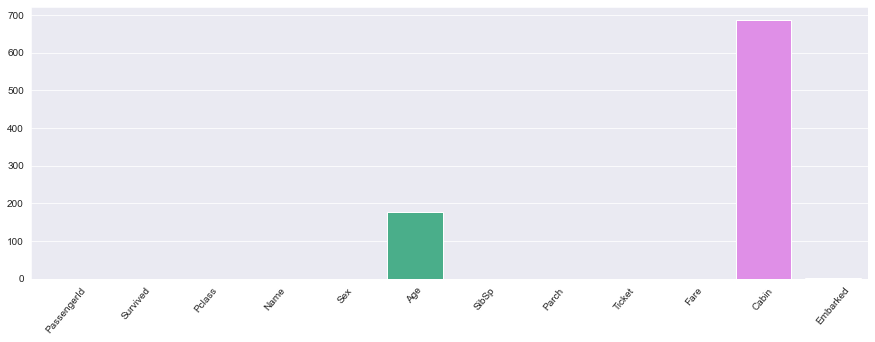

In [7]:
sns.barplot(x=tit_d.columns, y = tit_d.isnull().sum().values)
plt.xticks(rotation= 50)
plt.show()
##how many values are missing ifrom each value

In [8]:
tit_d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

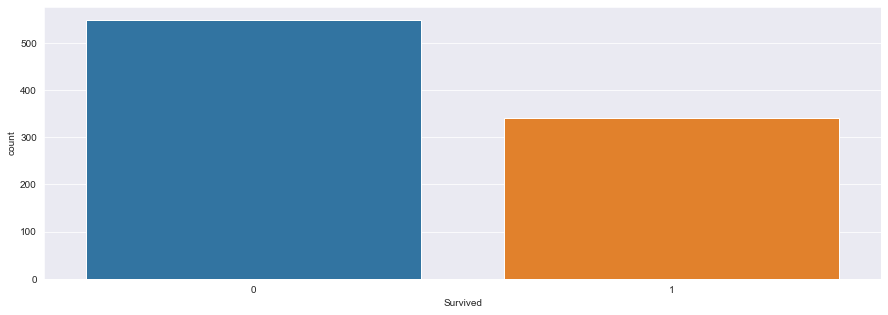

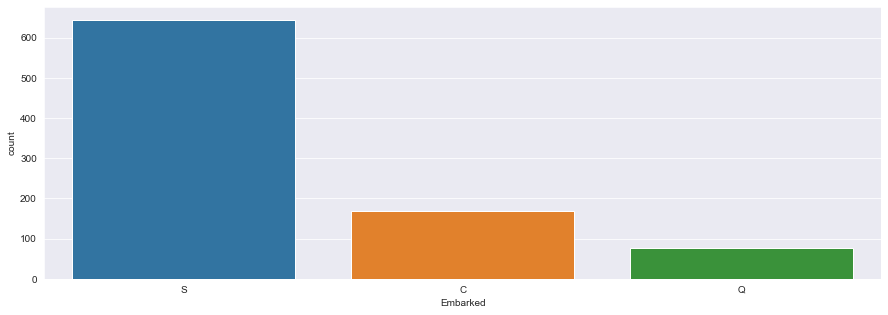

In [9]:
sns.countplot(x=tit_d['Survived'])
plt.show()
sns.countplot(x=tit_d['Embarked'])
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

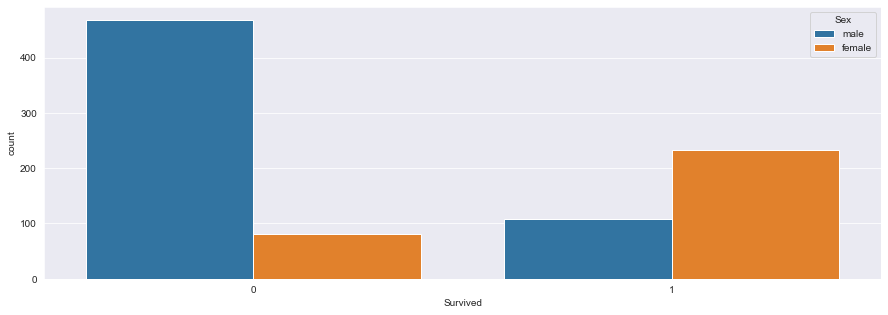

In [10]:
sns.countplot(x=tit_d['Survived'], hue='Sex', data=tit_d)
##less males survived the titanic

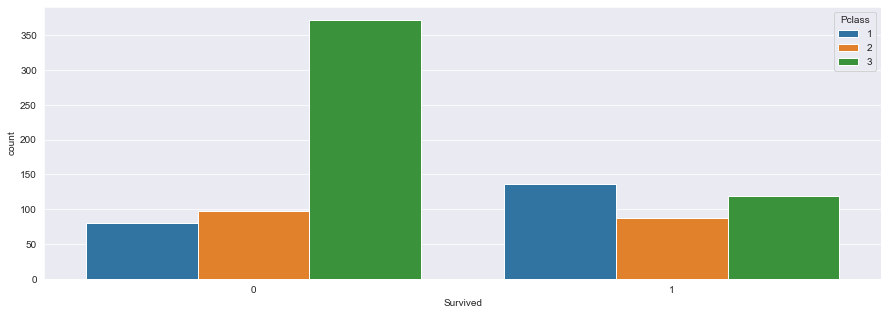

In [11]:
sns.countplot(x=tit_d['Survived'], hue='Pclass', data=tit_d)
plt.show()

##interpration: class tickets, mostly the 3rd class (lower class) didnt survive, and the 1st class survived.

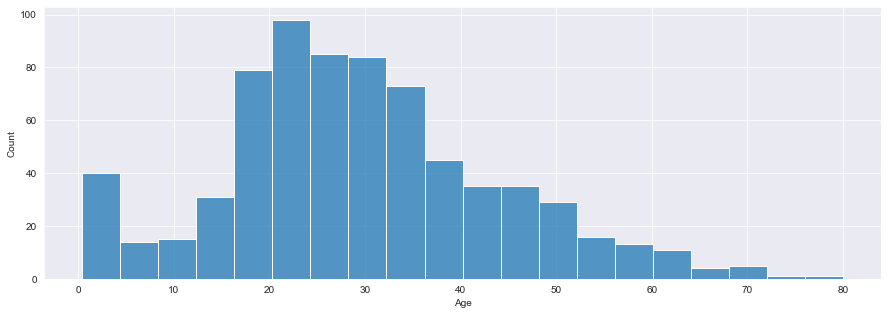

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
sns.histplot(x=tit_d['Age'].dropna())
plt.show()
tit_d['Age'].describe()

In [13]:
## the majority of passengers were between 20 and 38 years old, the data is slightly right skewed, where the average age is 29


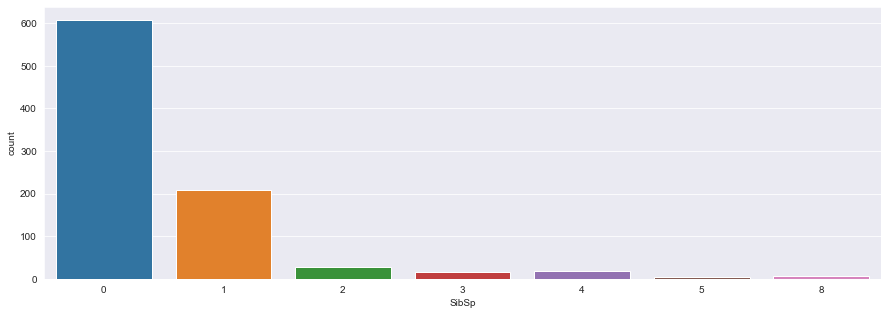

In [14]:
sns.countplot(x=tit_d['SibSp'])
plt.show()

#most of the passengers on board didnt have siblings on board, there were about 200 that had just one sibling.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

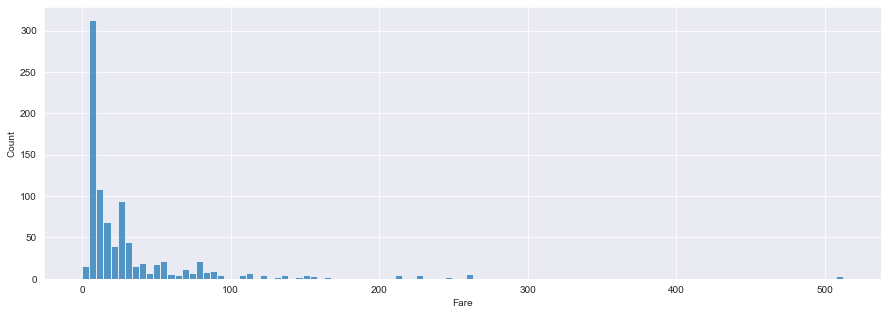

In [15]:
sns.histplot(x=tit_d['Fare'])


In [16]:
tit_d['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
#most of the passengers, paid between 7 and 31 $$$
## interestingly enough there were a few people who paid an exorbitant amount of money for a pass on the titanic


In [18]:
avg_age = int(tit_d['Age'].mean())
##saving the mean of the avg age into a variable

tit_d['Age'] = tit_d['Age'].apply(lambda age : avg_age if pd.isnull(age) else age)

In [19]:
tit_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


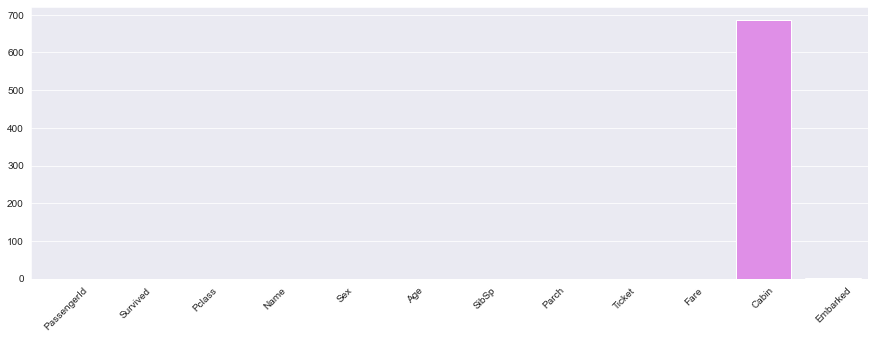

In [21]:
sns.barplot(x=tit_d.columns, y=tit_d.isnull().sum().values)
plt.xticks(rotation=45)
plt.show()

In [23]:
tit_d.drop(labels=['Cabin'], axis=1, inplace=True)
tit_d.dropna(inplace=True)

In [24]:
tit_d = pd.get_dummies(data=tit_d, columns = ['Sex', 'Embarked'], drop_first = True)
tit_d.drop(labels = ['Name', 'Ticket'], axis=1, inplace = True)

In [25]:
tit_d.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
X = tit_d[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q','Embarked_S']]
y = tit_d['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))
print(classification_report (y_test, predictions))


[[139  24]
 [ 57  47]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       163
           1       0.66      0.45      0.54       104

    accuracy                           0.70       267
   macro avg       0.69      0.65      0.66       267
weighted avg       0.69      0.70      0.68       267



In [35]:
mlp2 = MLPClassifier(max_iter=5000, activation='tanh', hidden_layer_sizes=(1000,900))
mlp2.fit(X_train,y_train)

predictions2 = mlp2.predict(X_test)

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[142  21]
 [ 65  39]]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       163
           1       0.65      0.38      0.48       104

    accuracy                           0.68       267
   macro avg       0.67      0.62      0.62       267
weighted avg       0.67      0.68      0.65       267

